# Data Preparation

In [1]:
hotels_df = pd.read_csv('booking.com.csv')
hotels_df

name   price  Area  rating  reviews   distance       day  \
0     제주오리엔탈호텔 & 카지노   67725    24     7.7      587   2.738362  20200902   
1         다인 오세아노 호텔  355555   101     8.1      541  12.129263  20200902   
2        블랙 샌즈 호텔 제주   49600    25     7.7      120   8.986851  20200902   
3           제주 베스트 힐   79000    59     9.0       20  16.686766  20200902   
4         제주 하바나 리조트   59000    36     7.7      230  35.060464  20200902   
...              ...     ...   ...     ...      ...        ...       ...   
4899       제주 삼다 호스텔   46540    45     7.6        9   0.830589  20200928   
4900      예스준 게스트하우스   25000    20     8.7       12   1.922235  20200928   
4901       미르 게스트하우스   58500    23     8.5      305   1.809006  20200928   
4902       예하 게스트하우스   60000    23     8.9      545   2.748919  20200928   
4903         호텔 메르블루  130784    27     8.7        8   0.657127  20200928   

      weekend  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
4899        0  
4900        0  
4901        0  
4902        0  
4903        0  

[4904 rows x 8 columns]

In [2]:
hotels_df.groupby(['name'])['price'].count()

name
At corner resort & garden             8
Fantastic Ocean View Sydney Hotel    25
Hamdeok Beautiful House              26
Harry and Sodam Pension 조식무료제공       19
J2 패밀리 호텔                            24
                                     ..
홍양펜션                                 26
홍익 제주 호텔                             25
화이트드림 펜션                             26
휴 모텔                                 25
힐파크 호텔                               23
Name: price, Length: 233, dtype: int64

In [3]:
hotels_name = hotels_df.copy()
hotels_name = hotels_name.drop_duplicates(['name'], keep='first', ignore_index=True)
hotels_name['name']

0      제주오리엔탈호텔 & 카지노
1          다인 오세아노 호텔
2         블랙 샌즈 호텔 제주
3            제주 베스트 힐
4          제주 하바나 리조트
            ...      
228            르메인 호텔
229           엠제이 리조트
230     어반 아일랜드 호텔 제주
231             아템파우제
232       그린데이 게스트하우스
Name: name, Length: 233, dtype: object

In [4]:
hotels_df.price.sort_values()

3942      17100
4504      17100
1953      20931
3457      20931
4064      20931
         ...   
4393     412810
2991     412810
599      587942
1845     632978
3527    1620000
Name: price, Length: 4904, dtype: int64

# EDA

## Before outlier removal

### Correlation

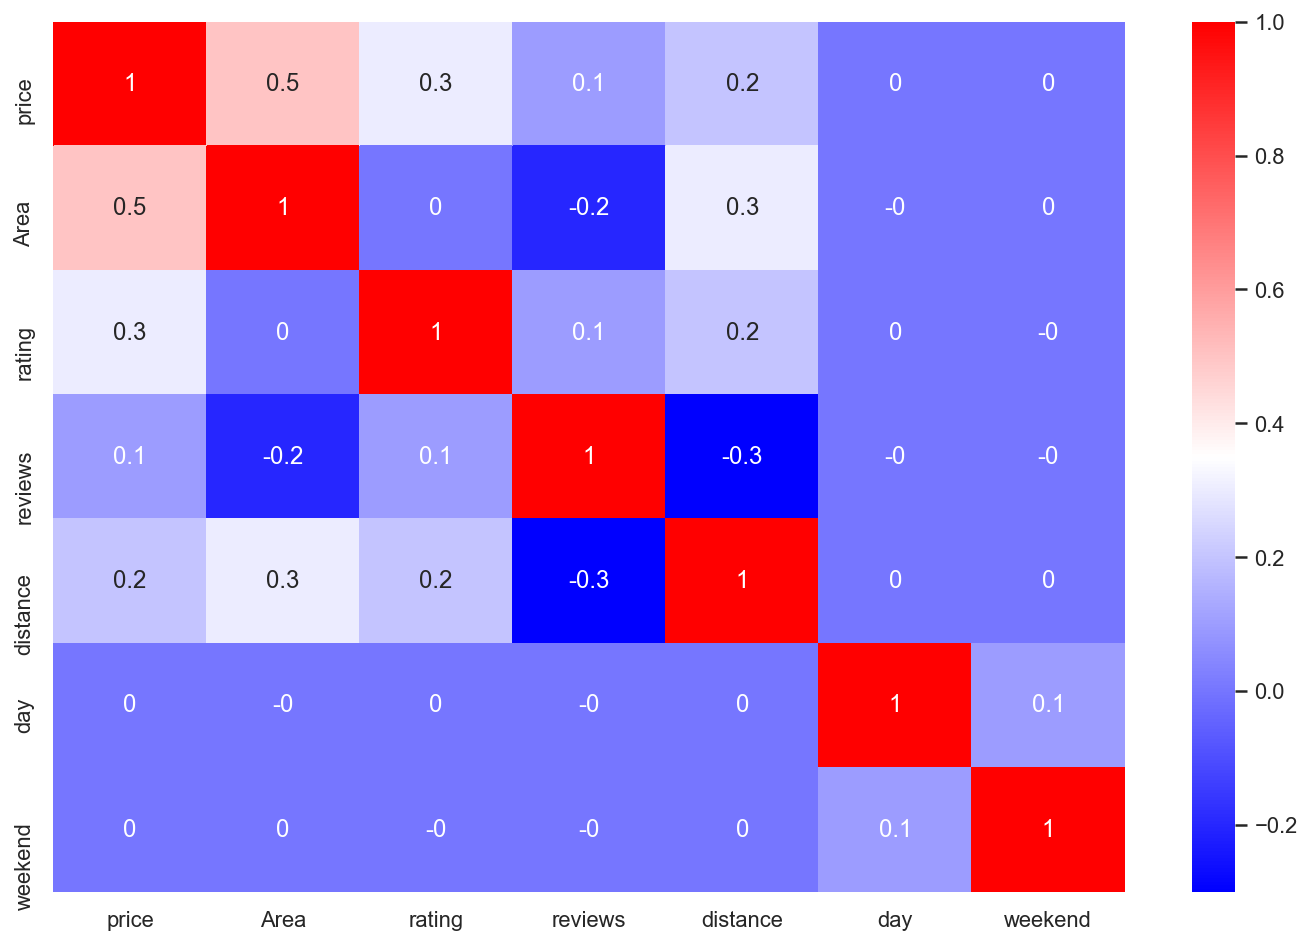

In [5]:
corr_mat = hotels_df.corr().round(1)
sns.set(rc={"figure.figsize":(12, 8)})
sns.heatmap(data=corr_mat, annot=True, cmap="bwr");

### Area, rating, distance, weekend, day

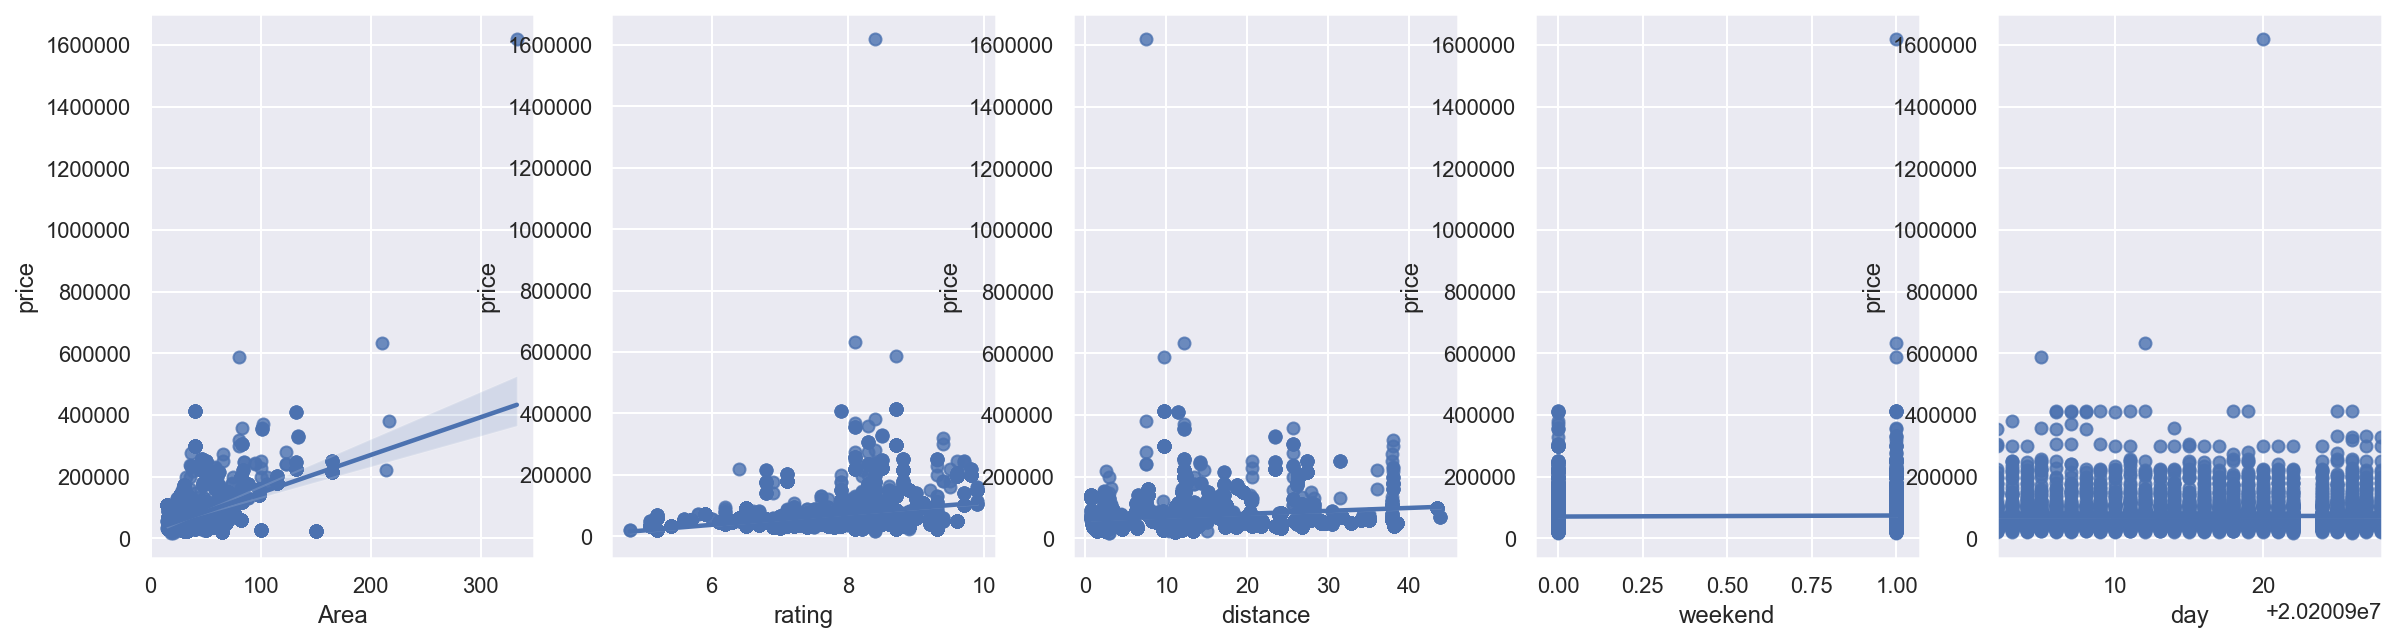

In [6]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(20, 5)})
fig, ax = plt.subplots(ncols=5)
sns.regplot(x='Area', y='price', data=hotels_df, ax=ax[0])
sns.regplot(x='rating', y='price', data=hotels_df, ax=ax[1])
sns.regplot(x='distance', y='price', data=hotels_df, ax=ax[2])
sns.regplot(x='weekend', y='price', data=hotels_df, ax=ax[3])
sns.regplot(x='day', y='price', data=hotels_df, ax=ax[4]);

In [7]:
import plotly.express as px

px.box(hotels_df, y="price")

## Outlier Removal

In [8]:
def get_outlier(df=hotels_df, column="price", weight=3.5):
    price = hotels_df["price"]    
    quantile_25 = np.percentile(price.values, 25)
    quantile_75 = np.percentile(price.values, 75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = hotels_df[(price < lowest_val) | (price > highest_val)].index
    
    return outlier_index

In [9]:
get_outlier(df=hotels_df, column="price", weight=3.5)

Int64Index([   1,   45,   65,  103,  145,  185,  194,  206,  228,  247,
            ...
            4536, 4546, 4551, 4619, 4629, 4723, 4733, 4749, 4779, 4821],
           dtype='int64', length=154)

In [10]:
hotels_df_copy = hotels_df.copy()
hotels_df_copy.shape

(4904, 8)

In [11]:
outlier_index = get_outlier(df=hotels_df, column="price", weight=3.5)
hotels_df_copy.drop(outlier_index, axis=0, inplace=True)
hotels_df_copy.shape

(4750, 8)

In [12]:
# 3.5 weight 가정하고 outlier 처리시 약 3프로 정도 제외됨
(len(hotels_df_copy)/len(hotels_df)) -1

-0.031402936378466584

In [13]:
hotels_df_copy.reset_index(inplace=True)
hotels_df_copy

index            name   price  Area  rating  reviews   distance  \
0         0  제주오리엔탈호텔 & 카지노   67725    24     7.7      587   2.738362   
1         2     블랙 샌즈 호텔 제주   49600    25     7.7      120   8.986851   
2         3        제주 베스트 힐   79000    59     9.0       20  16.686766   
3         4      제주 하바나 리조트   59000    36     7.7      230  35.060464   
4         5    호텔 앨리스 앤 트렁크   81000    26     8.3       55   2.859278   
...     ...             ...     ...   ...     ...      ...        ...   
4745   4899       제주 삼다 호스텔   46540    45     7.6        9   0.830589   
4746   4900      예스준 게스트하우스   25000    20     8.7       12   1.922235   
4747   4901       미르 게스트하우스   58500    23     8.5      305   1.809006   
4748   4902       예하 게스트하우스   60000    23     8.9      545   2.748919   
4749   4903         호텔 메르블루  130784    27     8.7        8   0.657127   

           day  weekend  
0     20200902        0  
1     20200902        0  
2     20200902        0  
3     20200902        0  
4     20200902        0  
...        ...      ...  
4745  20200928        0  
4746  20200928        0  
4747  20200928        0  
4748  20200928        0  
4749  20200928        0  

[4750 rows x 9 columns]

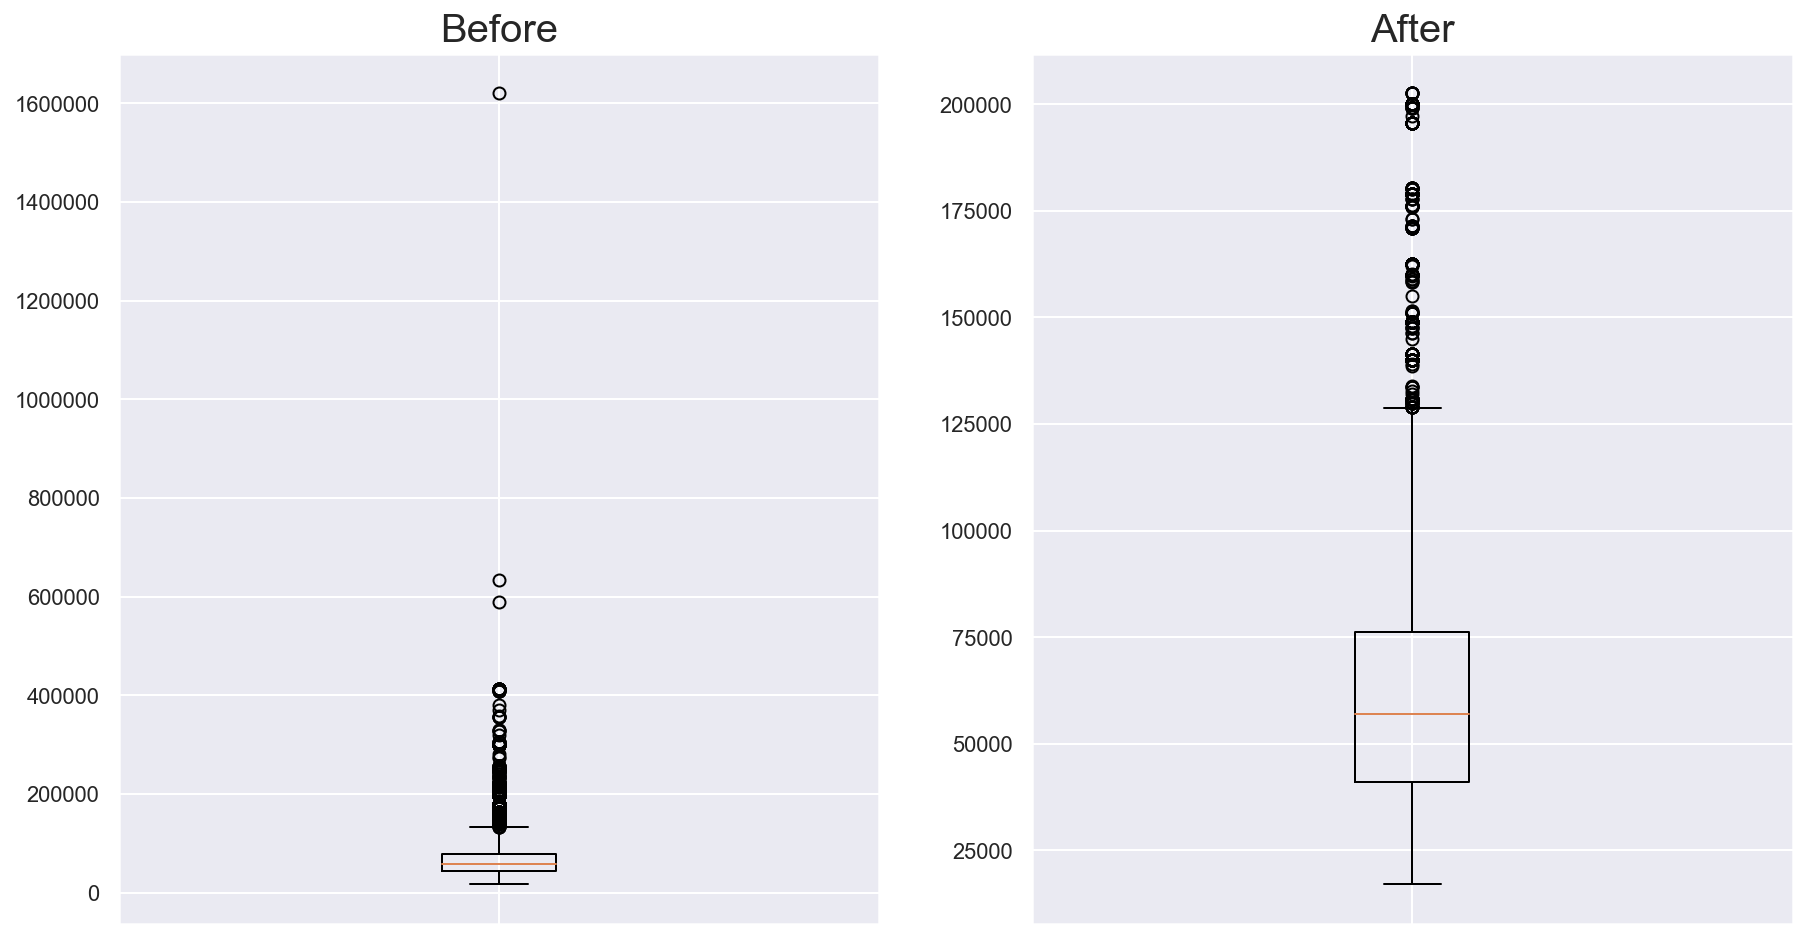

In [14]:
import plotly.express as px

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(15, 8)})
fig, ax = plt.subplots(ncols=2)

ax[0].boxplot(hotels_df.price)
ax[0].set_title('Before', fontsize=20)
ax[0].set_xticklabels('')

ax[1].boxplot(hotels_df_copy.price)
ax[1].set_title('After', fontsize=20)
ax[1].set_xticklabels('');

## After outlier removal

In [ ]:
corr_mat = hotels_df_copy.corr().round(1)
sns.set(rc={"figure.figsize":(12, 8)})
sns.heatmap(data=corr_mat, annot=True, cmap="bwr");

In [15]:
# 아웃라이어 제거 후 호텔 가격
import plotly.express as px

px.box(hotels_df_copy, y="price")

### Area, rating, distance, weekend, day

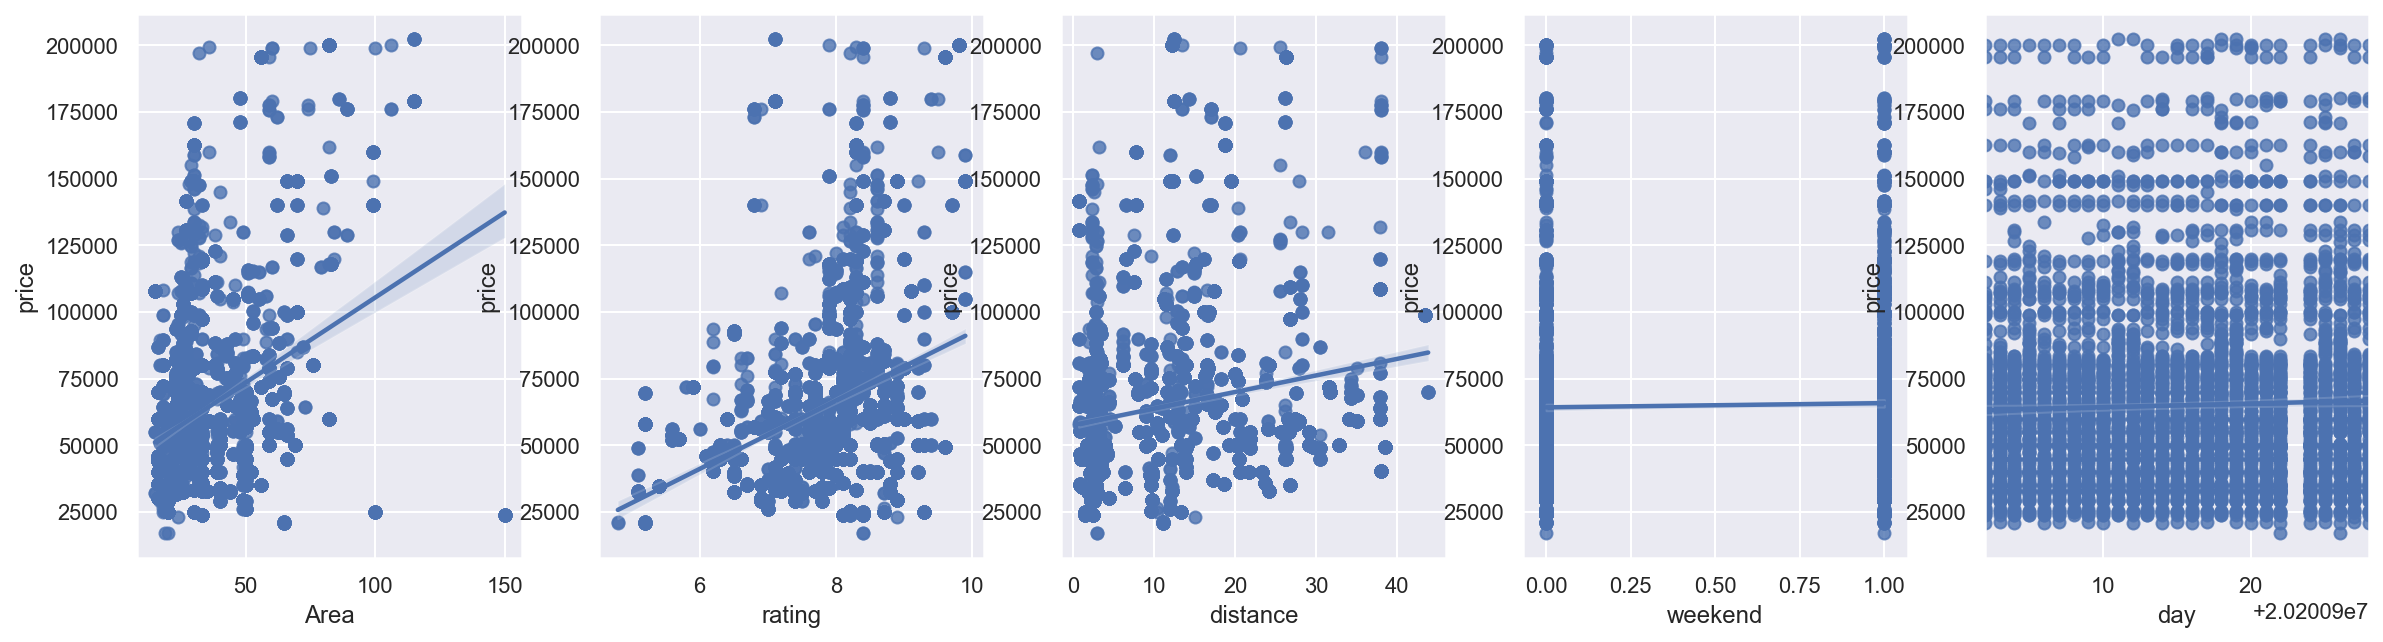

In [16]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(20, 5)})
fig, ax = plt.subplots(ncols=5)
sns.regplot(x='Area', y='price', data=hotels_df_copy, ax=ax[0])
sns.regplot(x='rating', y='price', data=hotels_df_copy, ax=ax[1])
sns.regplot(x='distance', y='price', data=hotels_df_copy, ax=ax[2])
sns.regplot(x='weekend', y='price', data=hotels_df_copy, ax=ax[3])
sns.regplot(x='day', y='price', data=hotels_df_copy, ax=ax[4]);

## Scaler

In [17]:
X = hotels_df_copy[['Area', 'rating', 'reviews', 'distance', 'weekend']]
y = hotels_df_copy['price']

In [18]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Box(y=X["Area"], name="Area"))
fig.add_trace(go.Box(y=X["rating"], name="rating"))
fig.add_trace(go.Box(y=X["reviews"], name="reviews"))
fig.add_trace(go.Box(y=X["distance"], name="distance"))

fig.show();

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

MMS = MinMaxScaler()
SS = StandardScaler()

SS.fit(X)
MMS.fit(X)

X_ss = SS.transform(X)
X_mms = MMS.transform(X)

In [20]:
X_ss_pd = pd.DataFrame(X_ss, columns=X.columns)
X_mms_pd = pd.DataFrame(X_mms, columns=X.columns)

### Minmaxscaler

In [21]:
fig = go.Figure()
fig.add_trace(go.Box(y=X_mms_pd["Area"], name="Area"))
fig.add_trace(go.Box(y=X_mms_pd["rating"], name="rating"))
fig.add_trace(go.Box(y=X_mms_pd["reviews"], name="reviews"))
fig.add_trace(go.Box(y=X_mms_pd["distance"], name="distance"))

fig.show();

### standardscaler

In [22]:
fig = go.Figure()
fig.add_trace(go.Box(y=X_ss_pd["Area"], name="Area"))
fig.add_trace(go.Box(y=X_ss_pd["rating"], name="rating"))
fig.add_trace(go.Box(y=X_ss_pd["reviews"], name="reviews"))
fig.add_trace(go.Box(y=X_ss_pd["distance"], name="distance"))

fig.show();

# Regression Models

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

## Linear Regression

In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

pred_tr = lr.predict(X_train)
pred_test = lr.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print("RMSE of Train Data : ", rmse_tr)
print("RMSE of Test Data : ", rmse_test)

print("r2 score of Train Data : ", r2_score(y_train, pred_tr))
print("r2 score of Test Data : ", r2_score(y_test, pred_test))

RMSE of Train Data :  28706.688414446064
RMSE of Test Data :  27549.056886837352
r2 score of Train Data :  0.2713355744005722
r2 score of Test Data :  0.2962487550499314


## Decision Tree

In [24]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

pred_tr = dtr.predict(X_train)
pred_test = dtr.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print("RMSE of Train Data : ", rmse_tr)
print("RMSE of Test Data : ", rmse_test)

print("r2 score of Train Data : ", r2_score(y_train, pred_tr))
print("r2 score of Test Data : ", r2_score(y_test, pred_test))

RMSE of Train Data :  2976.038311586552
RMSE of Test Data :  6099.172798880274
r2 score of Train Data :  0.9921686179420022
r2 score of Test Data :  0.9655056806312856


## RandomForest

In [25]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

pred_tr = rfr.predict(X_train)
pred_test = rfr.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print("RMSE of Train Data : ", rmse_tr)
print("RMSE of Test Data : ", rmse_test)

print("r2 score of Train Data : ", r2_score(y_train, pred_tr))
print("r2 score of Test Data : ", r2_score(y_test, pred_test))

RMSE of Train Data :  3413.989138581619
RMSE of Test Data :  5308.223933169272
r2 score of Train Data :  0.9896941065880014
r2 score of Test Data :  0.9738721198052238


## GradientBoostingRegressor, XGBRegressor, LGBMRegressor

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Evaluation

## RMSE & R2 score

In [27]:
names = []
train_rmse = []
test_rmse = []
train_r2 = []
test_r2 = []

models = []
models.append(('LinearReg', LinearRegression()))
models.append(('DecisionTree', DecisionTreeRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('GradientB', GradientBoostingRegressor()))
models.append(('XGradianB', XGBRegressor()))
models.append(('LightGBM', LGBMRegressor()))

for name, model in models:
    model.fit(X_train, y_train)
    pred_test = model.predict(X_test)
    pred_train = model.predict(X_train)

    names.append(name)
    train_rmse.append((np.sqrt(mean_squared_error(y_train, pred_train))))
    test_rmse.append((np.sqrt(mean_squared_error(y_test, pred_test))))
    test_r2.append(r2_score(y_test, pred_test))
    train_r2.append(r2_score(y_train, pred_train))

In [28]:
result = pd.DataFrame({'model name':names,
                       'train rmse':train_rmse,
                       'test rmse':test_rmse,
                       'train score':test_r2, 
                       'test score':train_r2}) 
result

model name    train rmse     test rmse  train score  test score
0     LinearReg  28706.688414  27549.056887     0.296249    0.271336
1  DecisionTree   2976.038312   5895.190261     0.967774    0.992169
2  RandomForest   3413.094120   5365.386403     0.973306    0.989700
3     GradientB  13484.785516  14077.261969     0.816244    0.839214
4     XGradianB   3074.690890   5495.817758     0.971993    0.991641
5      LightGBM   4882.735552   6539.204679     0.960349    0.978919

## Cross Validation

In [29]:
from sklearn.model_selection import KFold, cross_val_score, KFold

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=5, random_state=13, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, 
                                 cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(name)

    print(name, cv_results.mean(), cv_results.std())

LinearReg 0.25288483921675436 0.08885369730218055
DecisionTree 0.9594256901111764 0.01550007089616743
RandomForest 0.9660054344015784 0.012815257975567665
GradientB 0.81685595886143 0.020149571704488854
XGradianB 0.9707003965530131 0.007498585393220434
LightGBM 0.9609235082489989 0.006804069466389043


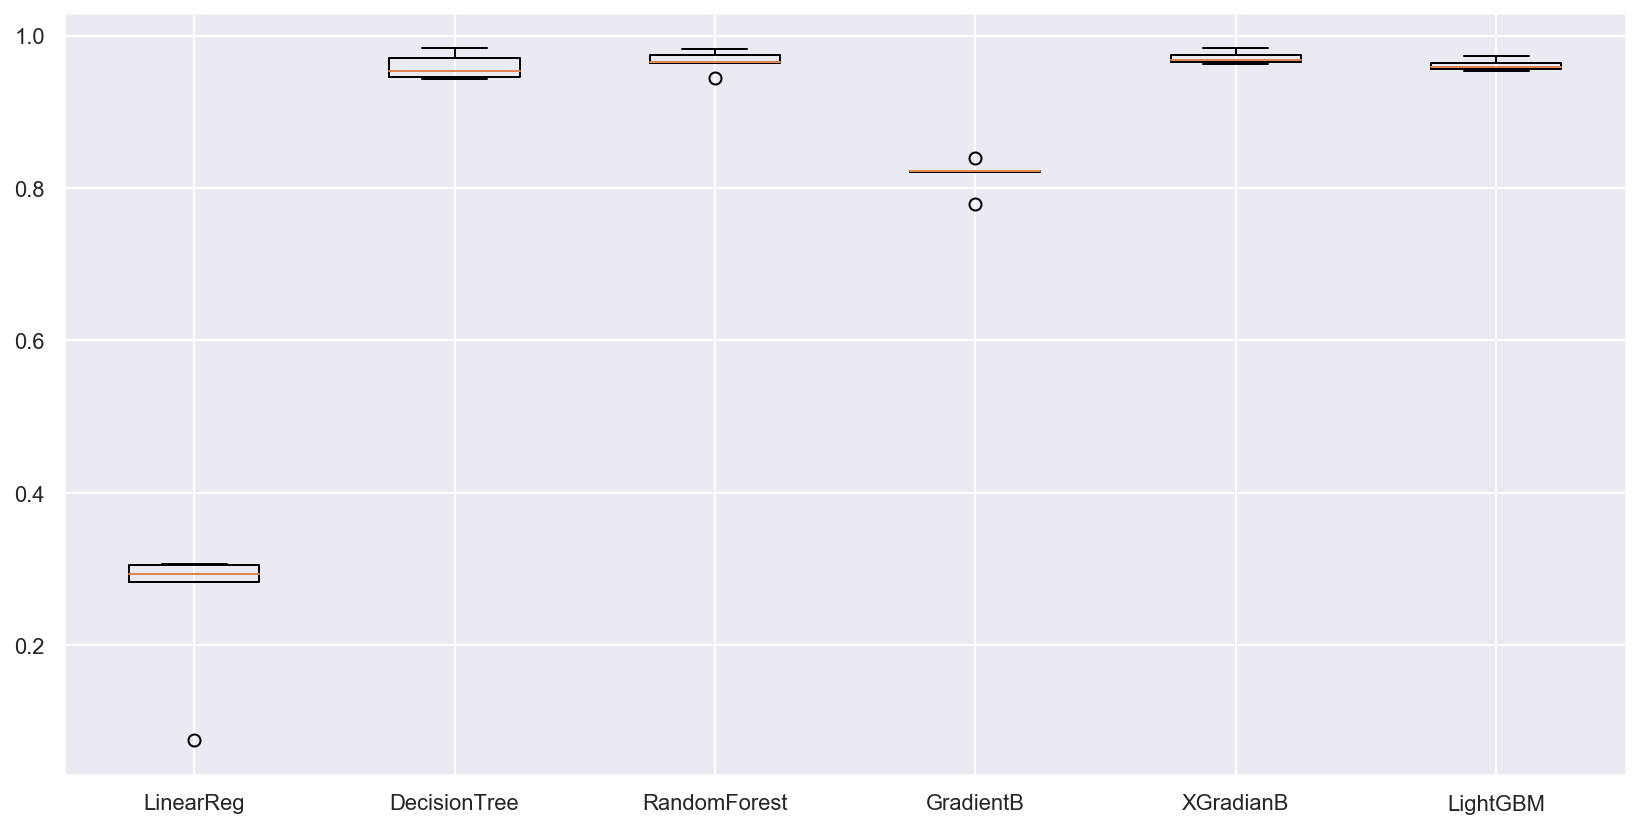

In [30]:
fig = plt.figure(figsize=(14, 7))
# fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show() 

In [31]:
result_cv = pd.DataFrame(results, index=names, columns=['1','2','3','4','5']) 
result_cv.T

LinearReg  DecisionTree  RandomForest  GradientB  XGradianB  LightGBM
1   0.075984      0.971037      0.973903   0.778873   0.974300  0.963616
2   0.293343      0.942765      0.964227   0.822781   0.967974  0.958248
3   0.305270      0.953916      0.965358   0.821100   0.964790  0.956596
4   0.283360      0.945960      0.944031   0.822178   0.962895  0.953357
5   0.306466      0.983450      0.982508   0.839348   0.983542  0.972801

## Pipeline

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [33]:
from sklearn.pipeline import Pipeline

estimators = [('scaler', StandardScaler()), 
              ('reg', LinearRegression())]

pipe = Pipeline(estimators)
pipe.fit(X_train, y_train)

scores = cross_val_score(pipe, X_train, y_train, cv=5)
scores

array([0.299876  , 0.26524336, 0.24761984, 0.25775884, 0.25538494])

In [34]:
for name, reg in models:
    pipe.set_params(reg=reg)
    scores = cross_val_score(pipe, X_train, y_train)
    print('--- ' + name + ' ---------------------')
    print(scores)

--- LinearReg ---------------------
[0.299876   0.26524336 0.24761984 0.25775884 0.25538494]
--- DecisionTree ---------------------
[0.95982882 0.95062126 0.95360257 0.97867448 0.97979062]
--- RandomForest ---------------------
[0.97958638 0.95649748 0.96151078 0.97569777 0.96259377]
--- GradientB ---------------------
[0.83192659 0.81235933 0.80363711 0.81946953 0.8222794 ]
--- XGradianB ---------------------
[0.97973899 0.97588966 0.96518491 0.98179806 0.97638624]
--- LightGBM ---------------------
[0.97376563 0.95398814 0.95712989 0.96586897 0.95901465]


In [35]:
pipe = Pipeline([('scaler', StandardScaler()),
                  ('reg', RandomForestRegressor())])

search_space = [{'reg': [DecisionTreeRegressor()],
                 'reg__max_depth': [3, 5, 10]},
                {'reg': [RandomForestRegressor()],
                 'reg__n_estimators': [10, 100, 1000],
                 'reg__max_depth': [3, 5, 10]},
                {'reg': [GradientBoostingRegressor()],
                'reg__n_estimators' : [100, 500],
                'reg__learning_rate' : [0.05, 0.1]}]

In [36]:
from sklearn.model_selection import GridSearchCV

reg = GridSearchCV(pipe, search_space, cv=5, verbose=0)
best_model = reg.fit(X_train, y_train) 

In [37]:
best_model.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('reg', GradientBoostingRegressor(n_estimators=500))])

In [38]:
pred_test = best_model.best_estimator_.fit(X_train, y_train).predict(X_test)

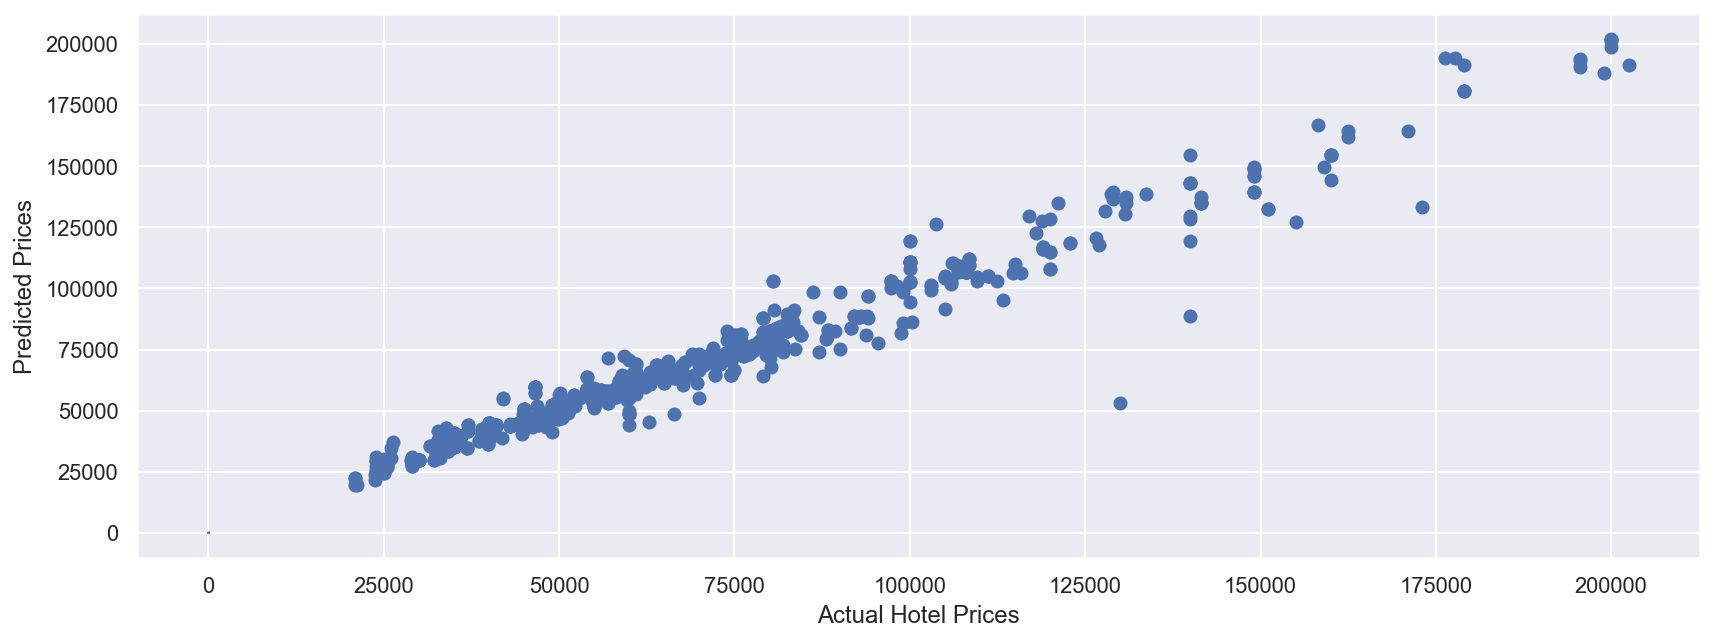

In [42]:
fig = plt.figure(figsize=(14, 5))
plt.scatter(y_test, pred_test)
plt.xlabel('Actual Hotel Prices')
plt.ylabel('Predicted Prices')
# plt.title('Prediction of Hotel Prices in Jeju-Island in Sep')
plt.plot([0, 48], [0, 48], 'r')
plt.show()

# Projection

In [40]:
# Area, Reviews, rating, distance, weekend (0:weekday)
jinseo = np.array([[30, 100, 8, 10, 0]])
print("Jinseo : ", int(best_model.best_estimator_.predict(jinseo)[0]), "Won")

Jinseo :  128675 Won


In [41]:
hyunggi = np.array([[30, 500, 8.5, 5, 1]])
print("Hyunggi : ", int(best_model.best_estimator_.predict(hyunggi)[0]), "Won")

Hyunggi :  147902 Won


|Area|Review count|Review score|Weekend(1)|Distance from Jeju Airport|Price|
|-----|-----|-----|-----|-----|-----|
|30|100|8|0|10|128675|
|30|500|8.5|1|5|147902|